# 샘플 데이터와 Boosting Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Sample Data
실습에서 사용할 데이터 생성

In [4]:
from sklearn.datasets import make_gaussian_quantiles

data_1, label_1 = make_gaussian_quantiles(
    cov=2, n_samples=200, n_features=2, n_classes=2, random_state=2021
)
data_2, label_2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=2021
)

In [6]:
data = np.concatenate((data_1, data_2))
label = np.concatenate((label_1, -label_2 + 1))

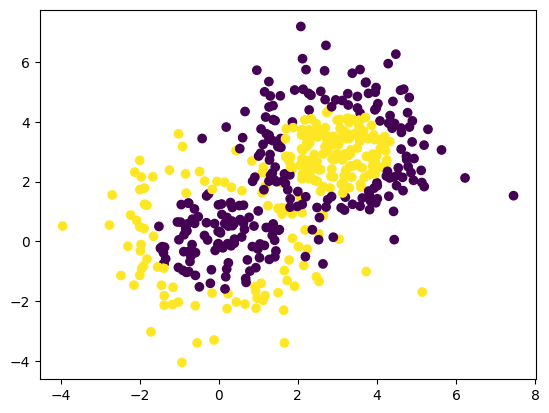

In [7]:
plt.scatter(data[:,0], data[:,1], c=label)

### 1.2 Data Split

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

### 1.3 시각화 데이터

In [11]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## 2. Decision Tree
기본적인 Decision Tree를 학습 후 결과를 비교

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)

### 2.1 학습

In [13]:
tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=2)

### 2.2 예측

In [16]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 평가

In [17]:
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)

In [18]:
print(f"Tree train accuracy is {tree_train_acc:.4f}")
print(f"Tree test accuracy is {tree_test_acc:.4f}")

Tree train accuracy is 0.7286
Tree test accuracy is 0.6867


### 2.4 시각화

In [19]:
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

Text(0.5, 1.0, 'Test Data')

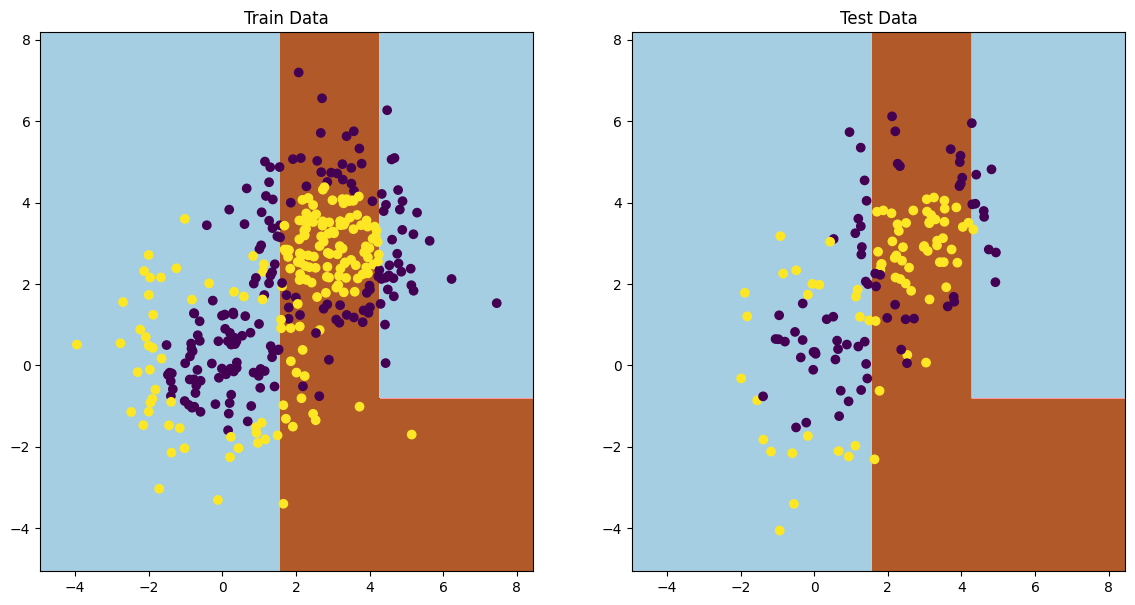

In [21]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)
plt.title("Train Data")

plt.subplot(122)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)
plt.title("Test Data")

## 3. AdaBoostClassifier
AdaBoostClassifier를 학습해보기  
AdaBoost는 `sklearn.ensemble`의 `AdaBoostClassifier`로 생성  
`AdaBoostClassifier`는 `base_estimator`를 선언해주어야 함  
간단한 `if else`로 데이터가 분류될 수 있도록 Depth가 1인 tree로 base_estimator 생성

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

### 3.1 학습

In [24]:
ada_boost.fit(train_data, train_label)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

### 3.2 예측

In [25]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 평가

In [27]:
from sklearn.metrics import accuracy_score

ada_boost_train_acc = accuracy_score(train_label, ada_boost_train_pred)
ada_boost_test_acc = accuracy_score(test_label, ada_boost_test_pred)

In [28]:
print(f"Ada Boost train accuracy is {ada_boost_train_acc:.4f}")
print(f"Ada Boost test accuracy is {ada_boost_test_acc:.4f}")

Ada Boost train accuracy is 0.9486
Ada Boost test accuracy is 0.8600


### 3.4 시각화

In [30]:
ada_boost_Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
ada_boost_Z = ada_boost_Z.reshape(xx.shape)

Text(0.5, 1.0, 'Test Data')

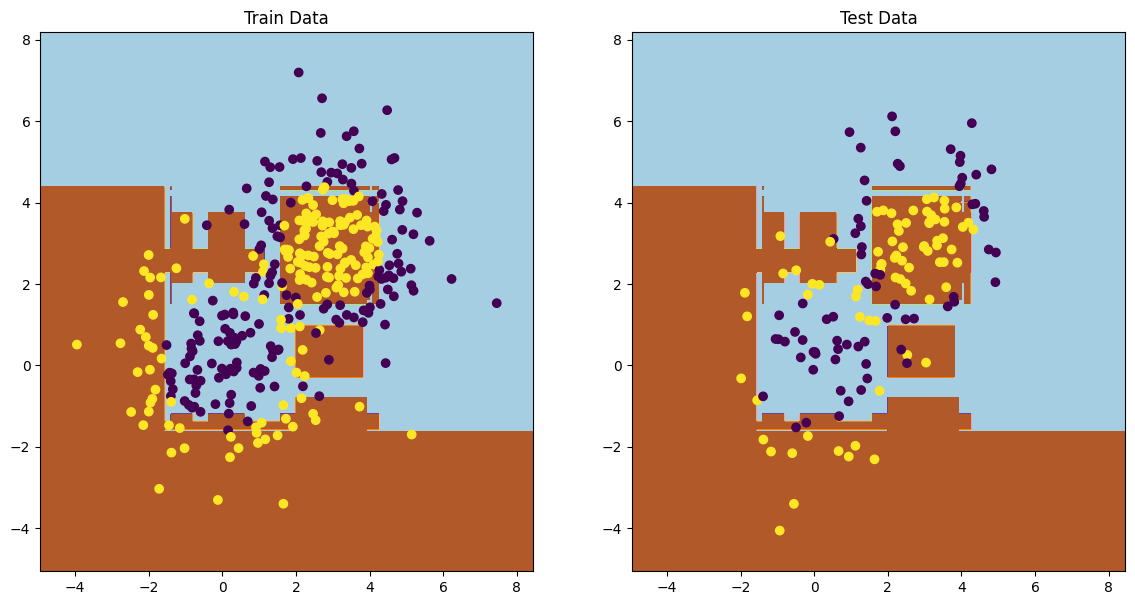

In [31]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)
plt.title("Train Data")

plt.subplot(122)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)
plt.title("Test Data")

## 4. GradientBoost Tree
Gradient Boost를 학습  
Gradient Boost는 `sklearn.ensemble`의 `GradientBoostingClassifier`로 생성  
Gradient Bosst도 간단한 `if else`로 데이터가 분류될 수 있도록 Depth가 1인 tree로 base_estimator 생성

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(max_depth=1)

### 4.1 학습

In [33]:
grad_boost.fit(train_data, train_label)

GradientBoostingClassifier(max_depth=1)

### 4.2 예측

In [34]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 평가

In [37]:
from sklearn.metrics import accuracy_score

grad_boost_train_acc = accuracy_score(train_label, grad_boost_train_pred)
grad_boost_test_acc = accuracy_score(test_label, grad_boost_test_pred)

In [38]:
print(f"Gradient Boost train accuracy is {grad_boost_train_acc:.4f}")
print(f"Gradient Boost test accuracy is {grad_boost_test_acc:.4f}")

Gradient Boost train accuracy is 0.8886
Gradient Boost test accuracy is 0.8200


### 4.4 시각화

In [40]:
grad_boost_Z = grad_boost.predict(np.c_[xx.ravel(), yy.ravel()])
grad_boost_Z = grad_boost_Z.reshape(xx.shape)

Text(0.5, 1.0, 'Test Data')

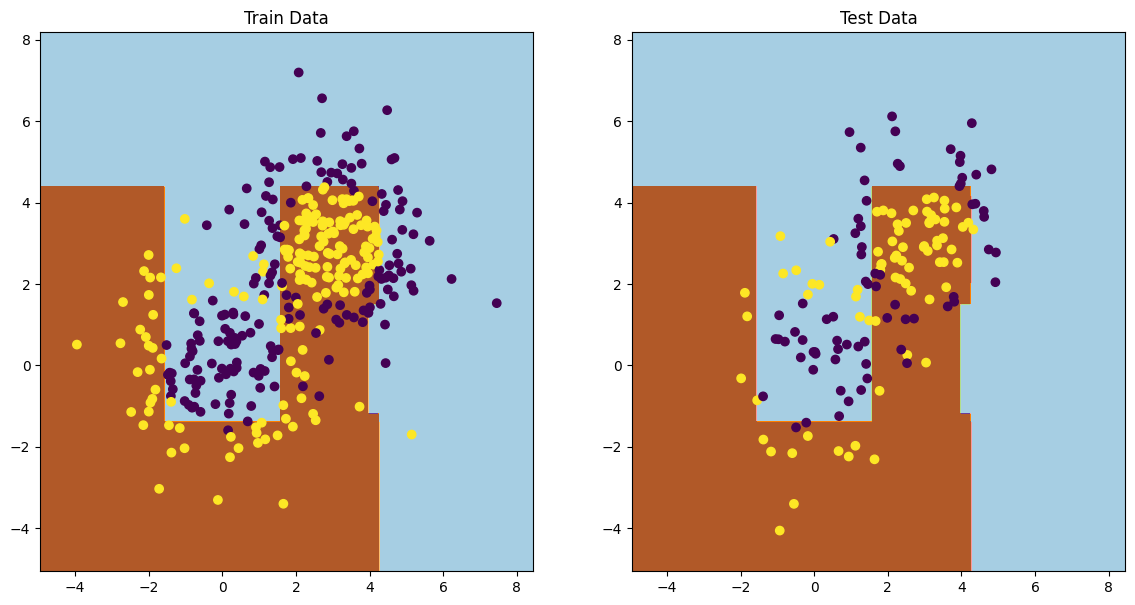

In [41]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)
plt.title("Train Data")

plt.subplot(122)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)
plt.title("Test Data")

## 4. 마무리

In [42]:
print(f"Tree test accuracy is {tree_test_acc:.4f}")
print(f"Ada Boost test accuracy is {ada_boost_test_acc:.4f}")
print(f"Gradient Boost test accuracy is {grad_boost_test_acc:.4f}")

Tree test accuracy is 0.6867
Ada Boost test accuracy is 0.8600
Gradient Boost test accuracy is 0.8200


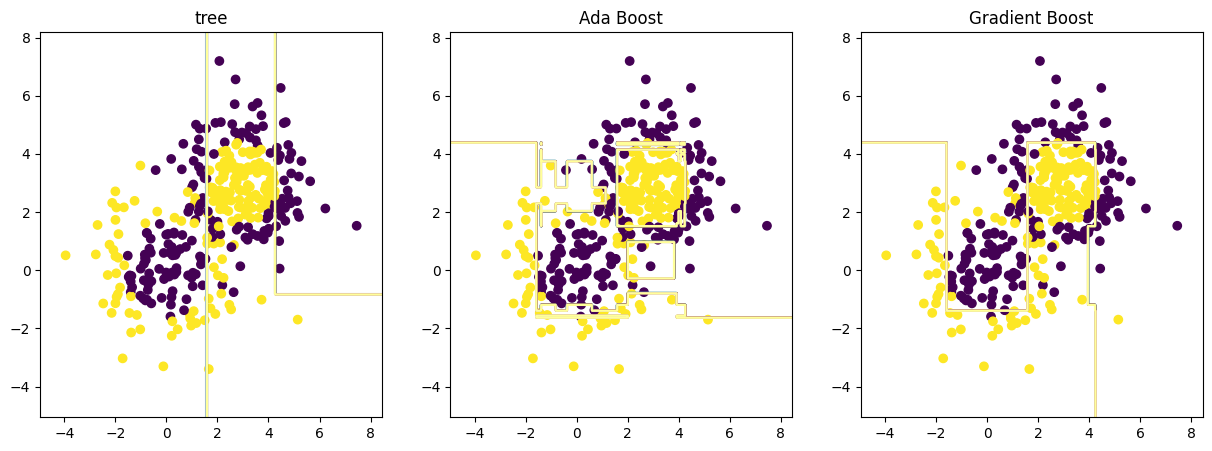

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

Z_name = [
    ("tree", tree_Z),
    ("Ada Boost", ada_boost_Z),
    ("Gradient Boost", grad_boost_Z)
]

for idx, (name, Z) in enumerate(Z_name):
  ax = axes[idx]
  ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
  ax.scatter(train_data[:, 0], train_data[:, 1], c=train_label)
  ax.set_title(name)